<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/rl/baselines-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baselines

* https://github.com/openai/baselines
* https://github.com/openai/baselines/blob/master/docs/viz/viz.ipynb
* https://github.com/openai/gym/blob/master/gym/envs/__init__.py#L498

In [0]:
!pip install git+https://github.com/openai/baselines >/dev/null

In [2]:
!rm -r ~/logs

rm: cannot remove '/root/logs': No such file or directory


In [3]:
# MsPacmanNoFrameskip-v4: Atari has no entropy source, so these are deterministic environments 

!OPENAI_LOGDIR=$HOME/logs/atari-ppo OPENAI_LOG_FORMAT=csv python -m baselines.run --alg=ppo2 --env=MsPacmanNoFrameskip-v4 --num_timesteps=30000 --nsteps=128

env_type: atari
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
Training ppo2 on atari:MsPacmanNoFrameskip-v4 with arguments 
{'nsteps': 128, 'nminibatches': 4, 'lam': 0.95, 'gamma': 0.99, 'noptepochs': 4, 'log_interval': 1, 'ent_coef': 0.01, 'lr': <function atari.<locals>.<lambda> at 0x7f25a6b84d08>, 'cliprange': <function atari.<locals>.<lambda> at 0x7f25944920d0>, 'network': 'cnn'}
2018-12-20 10:57:04.182978: I 

In [4]:
!ls -l ~/logs

total 4
drwxr-xr-x 2 root root 4096 Dec 20 10:57 atari-ppo


In [5]:
from baselines.common import plot_util as pu
results = pu.load_results('~/logs/atari-ppo')

Logging to /tmp/openai-2018-12-20-10-59-23-325901


/usr/local/lib/python3.6/dist-packages/baselines/bench/monitor.py:164: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


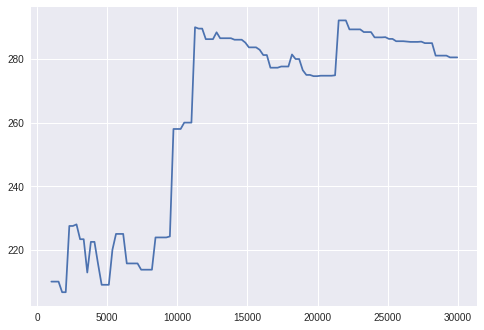

In [6]:
import matplotlib.pyplot as plt
import numpy as np
r = results[0]
plt.plot(r.progress.total_timesteps, r.progress.eprewmean)

In [7]:
!for seed in $(seq 0 5); do OPENAI_LOG_FORMAT=csv OPENAI_LOGDIR=$HOME/logs/atari-ppo-hp/b128-$seed python -m baselines.run --alg=ppo2 --env=MsPacmanNoFrameskip-v4 --num_timesteps=30000 --seed=$seed --nsteps=128; done

env_type: atari
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
Training ppo2 on atari:MsPacmanNoFrameskip-v4 with arguments 
{'nsteps': 128, 'nminibatches': 4, 'lam': 0.95, 'gamma': 0.99, 'noptepochs': 4, 'log_interval': 1, 'ent_coef': 0.01, 'lr': <function atari.<locals>.<lambda> at 0x7f8671d7fd08>, 'cliprange': <function atari.<locals>.<lambda> at 0x7f865f68d0d0>, 'network': 'cnn'}
2018-12-20 10:59:34.016061: I 

In [8]:
!ls -l ~/logs/atari-ppo-hp

total 24
drwxr-xr-x 2 root root 4096 Dec 20 10:59 b128-0
drwxr-xr-x 2 root root 4096 Dec 20 11:01 b128-1
drwxr-xr-x 2 root root 4096 Dec 20 11:04 b128-2
drwxr-xr-x 2 root root 4096 Dec 20 11:06 b128-3
drwxr-xr-x 2 root root 4096 Dec 20 11:09 b128-4
drwxr-xr-x 2 root root 4096 Dec 20 11:11 b128-5


In [9]:
results = pu.load_results('~/logs/atari-ppo-hp')

/usr/local/lib/python3.6/dist-packages/baselines/bench/monitor.py:164: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


(<matplotlib.figure.Figure at 0x7f22099e0630>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2209a467b8>]],
       dtype=object))

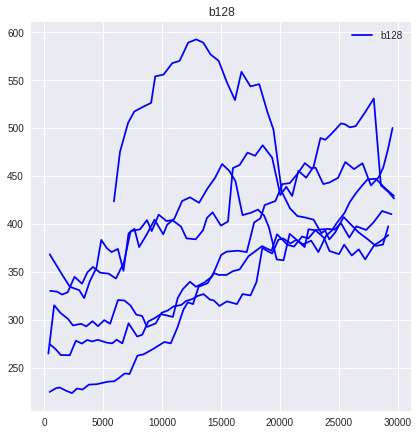

In [15]:
pu.plot_results(results)
# pu.plot_results(results, average_group=True)